In [1]:
from sympy import *
from IPython.display import *
init_printing()
var('a:z')
var('A:Z');

In [2]:
V=tanh(z)
Z=solve(V-v,z)[0]
Z=atanh(v)
Z

In [44]:
N=9
p=[]
f=series(exp(x*Z),v,0,N)
for i in range(N):
    p.append(factorial(i)*f.coeff(v,i))
p

In [4]:
N=9
q=[]
f=series(exp(y*V),z,0,N)
for i in range(N):
    q.append(factorial(i)*f.coeff(z,i))
q

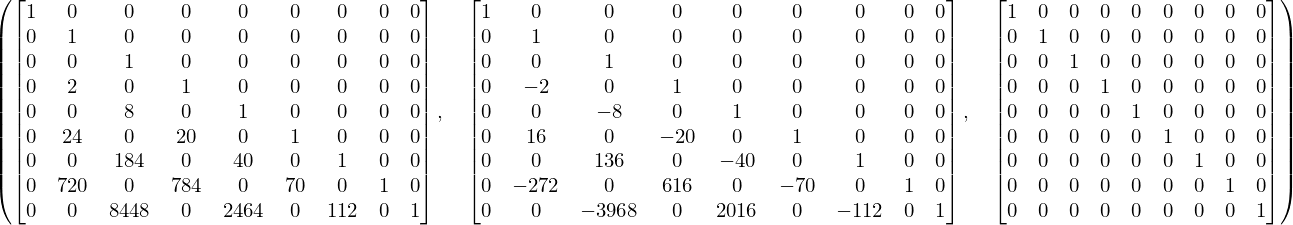

In [5]:
PCF=Matrix(N,N,lambda n,k: p[n].coeff(x,k))
QCF=Matrix(N,N,lambda n,k: q[n].coeff(y,k))
PCF,QCF,simplify(PCF*QCF)

In [6]:
qa=[]
for n in range(N):
    qa.append(bool(sum(p[n-k]*p[k].subs(x,y)*binomial(n,k) for k in range(n+1)).expand()-p[n].subs(x,x+y).expand()==0))
qa    

[True, True, True, True, True, True, True, True, True]

In [7]:
W=[]
WW=[]
for n in range(N):
    W.append(zeros(N,N))
    WW.append(zeros(N,N))
    for k in range(floor(N/2)):
        for l in range(floor(N/2)):
            W[n][k,l]=sum(binomial(n,j)*PCF[n-j,k]*PCF[j,l] for j in range(n+1))
            WW[n][k,l]=PCF[n,k+l]*binomial(k+l,l)
[(W[a]-WW[a]).is_zero for a in range(N)]

[True, True, True, True, True, True, True, True, True]

In [12]:
for i in range(N):
    display([p[i],q[i]])

In [9]:
yy=[]
for m in range(N):
    g=0
    for i in range(m+1):
       g=g+p[m].coeff(x,i)*q[i]
    yy.append(simplify(g))    

display(yy)
    
xx=[]    
for m in range(N):
    g=0
    for i in range(m+1):
       g=g+q[m].coeff(y,i)*p[i] 
    xx.append(simplify(g))
    
display(xx)    

In [10]:
display([expand(sum(binomial(n,k)*(-1)**k*ff(x/2,n-k)*ff(-x/2,k) for k in range(n+1)))-p[n] for n in range(N) ])
from sympy.functions.combinatorial.numbers import stirling
%store -r L
display([simplify(sum(stirling(n,m)*2**(n-m)*(L[m].subs(x,y)) for m in range(1,n+1))-q[n]) for n in range(1,N)])


"Time-zero" Krawtchouk polynomials:
$$p_n(x)=K_n(x/2;1/2,0)=\sum_{k=0}^n {n\choose k}(-1)^k\left(\frac{x}{2}\right)^{(n-k)}\left(-\frac{x}{2}\right)^{(k)}$$
referring to [DLMF](http://dlmf.nist.gov/), 18.23.3 .

For the tanh-polynomials, we have
$$q_n(y)=\sum_{m=1}^n S(n,m) 2^{n-m}p_m^{\rm Laguerre}(y)$$


In [52]:
for n in range(0,N-1,2):
    display(expand(y*q[n]-sum(binomial(n,2*j)*2**(2*j-1)*q[n+1-2*j] for j in range(1,1+Rational(n/2))))-q[n+1])

In [53]:
for n in range(1,N,2):
        display(expand(y*q[n]-sum(binomial(n,2*j)*2**(2*j-1)*q[n+1-2*j] for j in range(1,1+Rational((n-1)/2))))-q[n+1])